In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
# SPLITTING THE DATASET
df = pd.read_csv('DATASET-balanced 1.csv')
x = df.drop('LABEL', axis = 1)
y = df['LABEL']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,185):
   if y_pred[i] > 0.5:  # Indentation added here
    y_pred[i] = 1
else:
    y_pred[i] = 0

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 26
[LightGBM] [Info] Start training from score 0.495648


In [5]:
pred_final = np.round(model.predict(x_test))

In [6]:
accuracy = round(accuracy_score(y_test, pred_final) * 100, 3)
auc = round(roc_auc_score(y_test, pred_final), 3)
prec = round(precision_score(y_test, pred_final, average="binary", pos_label=1), 3)
rec = round(recall_score(y_test, pred_final, average="binary", pos_label=1), 3)
f1 = round(f1_score(y_test, pred_final, average="binary", pos_label=1), 3)
mcc = round(matthews_corrcoef(y_test, pred_final), 3)
mse = round(mean_squared_error(y_test, pred_final), 3)
mae = round(mean_absolute_error(y_test, pred_final), 3)

In [7]:
print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("MCC:", mcc)
print("Mean Squared Error (MSE) :", mse)
print("Mean Absolute Error (MAE):", mae)

 Accuracy: 90.577%
 AUC score: 0.906
Precision: 0.923
Recall: 0.893
F1-score: 0.907
MCC: 0.812
Mean Squared Error (MSE) : 0.094
Mean Absolute Error (MAE): 0.094


Confusion Matrix:
[[1046   91]
 [ 131 1088]]


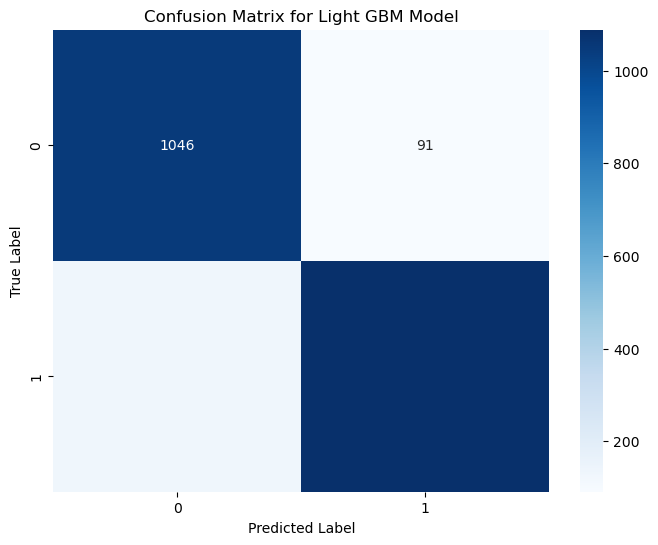

In [8]:
conf_matrix = confusion_matrix(y_test, pred_final)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the heat map for AdaBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Light GBM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()